**Часть 1: «Следствие ведёт детектив»**

- [ ]  Возьмите датасет из задания №1 [Модуль 1. **Введение в сбор данных**](https://www.notion.so/1-341985de290d4c1280ba3856ac98925f?pvs=21)
- [ ]  Проанализируйте пропуски: определите их процент и расположение (случайны ли пропуски или есть закономерность?)
- [ ]  Сформулируйте гипотезу о возможных причинах появления пропусков.
- [ ]  Проанализируйте датасет на выбросы удобным вам методом.

---

**Часть 2: «Выбор подходящего оружия»**

- [ ]  Примените несколько разных методов работы с пропусками, выбросами.
- [ ]  Приведите данные в единый вид, поработайте над категориальными признаками.
- [ ]  Оцените, как каждый из методов повлиял на распределение данных и результаты простого анализа (например, расчёт среднего или простая регрессия).

---

**Часть 3: «Раскрытие дела»**

- [ ]  Выберите и обоснуйте самый эффективный метод для вашего набора данных.
- [ ]  Сформулируйте краткую рекомендацию по оптимальному подходу к обработке пропущенных значений в вашем датасете.

🏆 **Дополнительные баллы** («Расследование с изюминкой»):

*+3 балла* Предложите собственный метод или комбинацию методов, которые лучше всего подходят именно для вашего случая.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from wordcloud import WordCloud


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [5]:
df = pd.read_parquet('final_merged.parquet')

# Определяем столбцы, которые заканчиваются на '_opendata' и '_citywalls'
opendata_cols = [col for col in df.columns if col.endswith('_opendata')]
citywalls_cols = [col for col in df.columns if col.endswith('_citywalls')]

# Считаем количество не-пропущенных значений в каждой строке для каждой группы
opendata_non_na_count = df[opendata_cols].notna().sum(axis=1)
citywalls_non_na_count = df[citywalls_cols].notna().sum(axis=1)

# Фильтруем строки: минимум 2 значения в каждой группе
df = df[(opendata_non_na_count >= 2) & (citywalls_non_na_count >= 2)]



In [6]:
df.shape

(11242, 119)

# Часть 1

In [7]:
df.columns = df.columns.str.replace(' ', '_')


## Анализ пропусков

### Пропуски по строкам

In [8]:
# Считаем процент пропусков в каждой строке
row_missing_percent = df.isnull().mean(axis=1) * 100

# Добавим этот столбец в датафрейм для наглядности
df['percent_missing'] = row_missing_percent

# Посмотрим на распределение пропусков по строкам
display(df['percent_missing'].describe())


count    11242.000000
mean        54.306928
std          3.560538
min         42.857143
25%         52.100840
50%         53.781513
75%         56.302521
max         68.907563
Name: percent_missing, dtype: float64

In [15]:
def show_misses(df):
    # Подсчет процента пропущенных значений в каждом столбце
    missing_percentage = df.isnull().mean() * 100

    # Сортировка столбцов по проценту пропусков
    missing_percentage = missing_percentage.sort_values(ascending=False)

    # Вывод столбцов с пропусками
    print("Столбцы с пропущенными значениями:")
    print(missing_percentage[missing_percentage > 0])

    # Общий процент пропусков в датасете
    total_missing = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
    print(f"\nОбщий процент пропусков в датасете: {total_missing:.2f}%")


show_misses(df)

Столбцы с пропущенными значениями:
Площадь_мансард,_м2                                         91.113681
Корпус_citywalls                                            89.183419
Корпус_opendata                                             88.623021
Корпус                                                      88.596335
Литера_citywalls                                            85.536381
Год_реконструкции_лифтов                                    84.691336
Количество_стволов_мусоропровода                            83.232521
Адрес_opendata                                              78.340153
Год_проведения_реконструкции                                70.885963
Год_ввода_лифтов_в_эксплуатацию                             63.084860
Общее_количество_лифтов                                     58.076855
Период                                                      55.443871
Год_постройки_citywalls                                     55.426081
Количество_встроенных_нежилых_помещений                

## Вывод

Большое кол-во пропусков в признаках обусловлено недостатками при обьединении. Мы удалим все бесполезные признаки, а потом посмотрим детальнее.


# Удаляем неинформативные столбцы

In [ ]:
missing_percentage = df.isnull().sum() / len(df)
cols_to_drop = missing_percentage[missing_percentage > 0.95].index
df.drop(columns=cols_to_drop, inplace=True)
show_misses(df)


wip:
  - Заполнение пропущенных значений годов постройки на основе архитектурного стиля
  - Создание бинарных признаков для известных архитекторов

### Выбросы

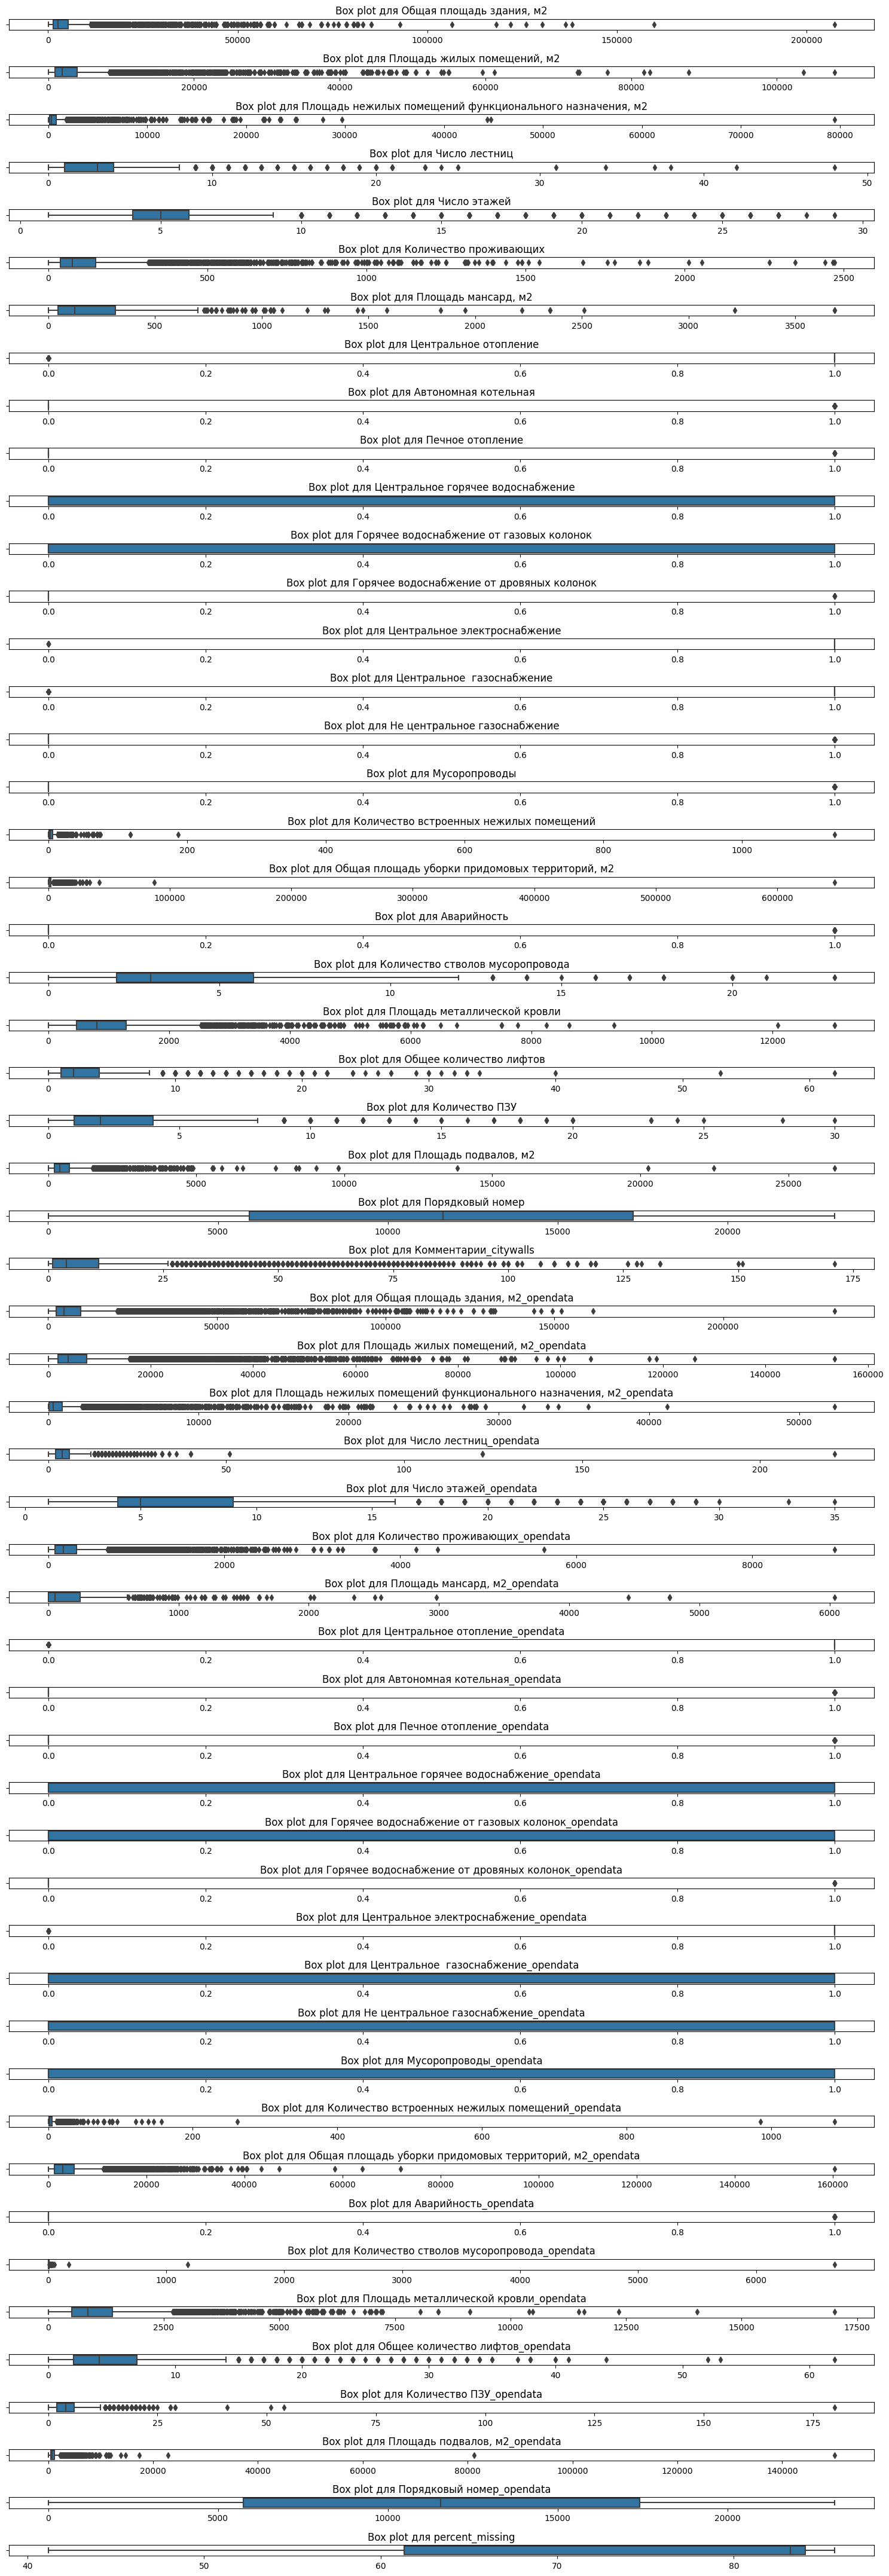


Обнаружение выбросов по методу IQR:

Столбец 'Общая площадь здания, м2':
  Границы: [-4625.28, 11218.93]
  Найдено выбросов: 695 (1.37%)

Столбец 'Площадь жилых помещений, м2':
  Границы: [-3526.72, 8429.07]
  Найдено выбросов: 681 (1.34%)

Столбец 'Площадь нежилых помещений функционального назначения, м2':
  Границы: [-851.50, 1806.90]
  Найдено выбросов: 524 (1.03%)

Столбец 'Число лестниц':
  Границы: [-3.50, 8.50]
  Найдено выбросов: 286 (0.56%)

Столбец 'Число этажей':
  Границы: [1.00, 9.00]
  Найдено выбросов: 547 (1.08%)

Столбец 'Количество проживающих':
  Границы: [-126.00, 314.00]
  Найдено выбросов: 537 (1.06%)

Столбец 'Площадь мансард, м2':
  Границы: [-356.43, 718.25]
  Найдено выбросов: 46 (0.09%)

Столбец 'Центральное отопление':
  Границы: [1.00, 1.00]
  Найдено выбросов: 208 (0.41%)

Столбец 'Автономная котельная':
  Границы: [0.00, 0.00]
  Найдено выбросов: 183 (0.36%)

Столбец 'Печное отопление':
  Границы: [0.00, 0.00]
  Найдено выбросов: 25 (0.05%)

Столбец 'Цен

In [8]:
# Выбираем только числовые столбцы для анализа выбросов
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Построение boxplot для каждого числового признака
plt.figure(figsize=(15, len(numeric_cols) * 0.8)) # Размер зависит от числа признаков
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot для {col}')
    plt.xlabel('') # Убираем подпись оси X для компактности

plt.tight_layout()
plt.show()

# Определение и подсчет выбросов по методу IQR
print("\nОбнаружение выбросов по методу IQR:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Находим выбросы
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"\nСтолбец '{col}':")
        print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Найдено выбросов: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
        # print(f"  Примеры выбросов:\n{outliers[col].head()}") # Можно раскомментировать для вывода примеров
    else:
        print(f"\nСтолбец '{col}': Выбросы не обнаружены по методу IQR.")

